<a href="https://colab.research.google.com/github/nadalabib76/Thesis/blob/main/Bachelor_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries & Dataset

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
URL = 'https://raw.githubusercontent.com/nadalabib76/Thesis/main/Song_Lyrics_and_Moods_final.csv'
df = pd.read_csv(URL)
df.head()

Artist           Song Name  \
0    John Legend           All of Me   
1  Lewis Capaldi       Before you go   
2            Sia          Breathe Me   
3          Adele  Someone Like You\n   
4      Passenger         Simple Song   

                                              Lyrics Mood  
0  "What would I do without your smart mouth?\nDr...  Sad  
1  I fell by the wayside, like everyone else\nI h...  Sad  
2  Help, I have done it again\nI have been here m...  Sad  
3  I heard that you're settled down\nThat you fou...  Sad  
4  Here's a simple song\nWon't stop the rain from...  Sad

## Exploratoy Data Analysis & Data Pre-processing

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Artist     334 non-null    object
 1   Song Name  334 non-null    object
 2   Lyrics     334 non-null    object
 3   Mood       334 non-null    object
dtypes: object(4)
memory usage: 10.6+ KB


In [76]:
df.isnull().sum()

Artist       0
Song Name    0
Lyrics       0
Mood         0
dtype: int64

In [77]:
df.head(100)

Artist           Song Name  \
0     John Legend           All of Me   
1   Lewis Capaldi       Before you go   
2             Sia          Breathe Me   
3           Adele  Someone Like You\n   
4       Passenger         Simple Song   
..            ...                 ...   
95           Muzz         Bad Feeling   
96       Arlo Day          Bad Timing   
97       The 1975       Be My Mistake   
98  Billie Marten                Bird   
99    Beach House           Black Car   

                                               Lyrics Mood  
0   "What would I do without your smart mouth?\nDr...  Sad  
1   I fell by the wayside, like everyone else\nI h...  Sad  
2   Help, I have done it again\nI have been here m...  Sad  
3   I heard that you're settled down\nThat you fou...  Sad  
4   Here's a simple song\nWon't stop the rain from...  Sad  
..                                                ...  ...  
95  Yeah, we're rolling\nLiving outside now\nEvery...  Sad  
96  Looking backwards\nGo back about a year\nTo bu...  Sad  
97  And be my mistake\nAnd turn out the light\nShe...  Sad  
98  She's underwater again\nSomebody's daughter, a...  Sad  
99  We want to go\nInside the cold\nIt's like a to...  Sad  

[100 rows x 4 columns]

In [78]:
df['Artist'].unique()

array(['John Legend', 'Lewis Capaldi', 'Sia', 'Adele', 'Passenger',
       'Billie Eilish', 'Kodaline', 'Lana Del Rey', 'Ed Sheeran\n',
       'Amy Winehouse', 'Camila Cabello', 'Calum Scott', 'Harry Styles',
       'Labrinth', 'Wiz Khalifa\n', 'Bruno Mars', 'Coldplay', 'Maroon 5',
       'Neil Young', 'FINNEAS', 'Sam Smith', 'Olivia Rodrigo',
       'Lady Gaga', 'The Weeknd ', 'Demi Lovato', 'Dua Lipa',
       'Sasha Sloan ', 'Elvis Presley', 'One Direction', 'Celine Dion\n',
       'Sam Smith ft. Normani', 'Zac Efron, Zendaya ', 'Snow Patrol',
       'Linkin Park', 'The Cranberries', 'Creedence Clearwater Revival',
       'Dolly Parton', 'Drake', 'Eagles', 'Hozier', 'Joni Mitchell',
       'Justin Bieber', 'Kendrick Lamar', 'Led Zeppelin', 'Miley Cyrus',
       'Pink Floyd', 'Prince', 'Queen', 'Radiohead', 'Sam Cooke',
       'Whitney Houston', 'Bon Iver', 'Christina Perri', 'Damien Rice',
       'Ed Sheeran', 'Elliott Smith', 'Evanescence', 'James Arthur',
       'Jeff Buckley', 'Le

In [79]:
df['Mood'].unique()

array(['Sad', 'Happy'], dtype=object)

In [80]:
for column in df.columns:
    print(f"{column} : {df[column].nunique()}")
    print("====================================")

Artist : 247
Song Name : 334
Lyrics : 334
Mood : 2


<Axes: xlabel='Mood', ylabel='count'>

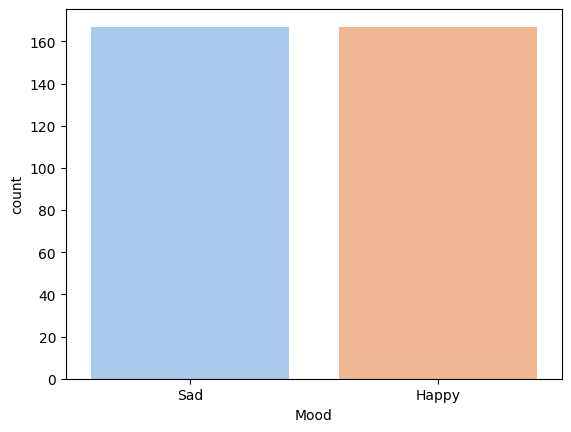

In [81]:
sns.countplot(x = 'Mood', data = df, palette = 'pastel')

## Data Cleaning

In [82]:
# Removing the lines (\n), raw strings (\r) and double quotations ("") from the lyrics column
df['Lyrics'] = df['Lyrics'].replace('\r',' ',regex=True)
df['Lyrics'] = df['Lyrics'].replace('\n',' ', regex=True)
df['Lyrics'] = df['Lyrics'].replace('"','',regex=True)

In [83]:
df

Artist                    Song Name  \
0            John Legend                    All of Me   
1          Lewis Capaldi                Before you go   
2                    Sia                   Breathe Me   
3                  Adele           Someone Like You\n   
4              Passenger                  Simple Song   
..                   ...                          ...   
329           The B-52's                   Love Shack   
330        Stevie Wonder                     Sir Duke   
331  The Pointer Sisters               I'm So Excited   
332      Michael Jackson  P.Y.T. (Pretty Young Thing)   
333         The Supremes         You Can't Hurry Love   

                                                Lyrics   Mood  
0    What would I do without your smart mouth? Draw...    Sad  
1    I fell by the wayside, like everyone else I ha...    Sad  
2    Help, I have done it again I have been here ma...    Sad  
3    I heard that you're settled down That you foun...    Sad  
4    Here's a simple song Won't stop the rain from ...    Sad  
..                                                 ...    ...  
329  If you see a faded sign at the side of the roa...  Happy  
330  Music is a world within itself With a language...  Happy  
331  Tonight's the night we're gonna make it happen...  Happy  
332  You know you, you make me feel so good inside ...  Happy  
333  I need love, love to ease my mind I need to fi...  Happy  

[334 rows x 4 columns]

In [84]:
# Checking the unique values in the lyrics column
df['Lyrics'].unique()

array(["What would I do without your smart mouth? Drawing me in, and you kicking me out You've got my head spinning, no kidding, I can't pin you down What's going on in that beautiful mind? I'm on your magical mystery ride And I'm so dizzy, don't know what hit me, but I'll be alright My head's under water But I'm breathing fine You're crazy and I'm out of my mind 'Cause all of me Loves all of you Love your curves and all your edges All your perfect imperfections Give your all to me I'll give my all to you You're my end and my beginning Even when I lose, I'm winning 'Cause I give you all of me And you give me all of you, oh-oh How many times do I have to tell you? Even when you're crying, you're beautiful too The world is beating you down, I'm around through every mood You're my downfall, you're my muse My worst distraction, my rhythm and blues I can't stop singing, it's ringing in my head for you My head's under water But I'm breathing fine You're crazy and I'm out of my mind 'Cause al

In [85]:
# Removing the lines (\n) from the artist column
df['Artist'] = df['Artist'].replace('\n','', regex=True)

In [86]:
# Checking the number of unique values in the artist column
df['Artist'].nunique()

246

In [87]:
# Checking the unique values in the artist column
df['Artist'].unique()

array(['John Legend', 'Lewis Capaldi', 'Sia', 'Adele', 'Passenger',
       'Billie Eilish', 'Kodaline', 'Lana Del Rey', 'Ed Sheeran',
       'Amy Winehouse', 'Camila Cabello', 'Calum Scott', 'Harry Styles',
       'Labrinth', 'Wiz Khalifa', 'Bruno Mars', 'Coldplay', 'Maroon 5',
       'Neil Young', 'FINNEAS', 'Sam Smith', 'Olivia Rodrigo',
       'Lady Gaga', 'The Weeknd ', 'Demi Lovato', 'Dua Lipa',
       'Sasha Sloan ', 'Elvis Presley', 'One Direction', 'Celine Dion',
       'Sam Smith ft. Normani', 'Zac Efron, Zendaya ', 'Snow Patrol',
       'Linkin Park', 'The Cranberries', 'Creedence Clearwater Revival',
       'Dolly Parton', 'Drake', 'Eagles', 'Hozier', 'Joni Mitchell',
       'Justin Bieber', 'Kendrick Lamar', 'Led Zeppelin', 'Miley Cyrus',
       'Pink Floyd', 'Prince', 'Queen', 'Radiohead', 'Sam Cooke',
       'Whitney Houston', 'Bon Iver', 'Christina Perri', 'Damien Rice',
       'Elliott Smith', 'Evanescence', 'James Arthur', 'Jeff Buckley',
       'Leonard Cohen', 'Maria

In [88]:
# Checking the unique values in the song name column
df['Song Name'].unique()

array(['All of Me', 'Before you go', 'Breathe Me', 'Someone Like You\n',
       'Simple Song', 'Bruises', "When the party's is over",
       'lovely (with Khalid)', 'All I Want', 'Video Games - Remastered',
       'The A Team', 'No Time To Die', 'Love Is A Losing Game',
       'Consequences', 'Dancing On My Own', 'Falling', 'Jealous',
       'See you again', 'When I was your man ', 'Easy on me ', 'Hold on',
       'My little love', 'Hiding my heart', 'Amsterdam', 'Sad',
       'Only Love Can Break Your Heart\r', 'Break my heart again',
       'Fine Line', 'Leave Your Lover', 'Traitor',
       "I'll Never Love Again", 'The Scientist', 'Call Out My Name',
       'Stone Cold', 'Homesick', 'Older ', 'In the Ghetto', 'Moments',
       'My Heart will go on', 'Dancing With A Stranger',
       'Rewrite The Stars', 'Chasing Cars', 'A Place for My Head',
       'One Step Closer', 'Papercut', 'Points of Authority', 'Zombie',
       'Fix You', 'Have You Ever Seen the Rain?', 'Jolene',
       'Hotl

In [89]:
# Removing the lines (\n),and raw strings (\r) from the song name column
df['Song Name'] = df['Song Name'].replace('\n','', regex=True)
df['Song Name'] = df['Song Name'].replace('\r','', regex=True)

In [90]:
# Checking the unique values in the song name column after cleaning
df['Song Name'].unique()

array(['All of Me', 'Before you go', 'Breathe Me', 'Someone Like You',
       'Simple Song', 'Bruises', "When the party's is over",
       'lovely (with Khalid)', 'All I Want', 'Video Games - Remastered',
       'The A Team', 'No Time To Die', 'Love Is A Losing Game',
       'Consequences', 'Dancing On My Own', 'Falling', 'Jealous',
       'See you again', 'When I was your man ', 'Easy on me ', 'Hold on',
       'My little love', 'Hiding my heart', 'Amsterdam', 'Sad',
       'Only Love Can Break Your Heart', 'Break my heart again',
       'Fine Line', 'Leave Your Lover', 'Traitor',
       "I'll Never Love Again", 'The Scientist', 'Call Out My Name',
       'Stone Cold', 'Homesick', 'Older ', 'In the Ghetto', 'Moments',
       'My Heart will go on', 'Dancing With A Stranger',
       'Rewrite The Stars', 'Chasing Cars', 'A Place for My Head',
       'One Step Closer', 'Papercut', 'Points of Authority', 'Zombie',
       'Fix You', 'Have You Ever Seen the Rain?', 'Jolene',
       'Hotline 

In [91]:
# Made a copy of the dataframe containing only the mood and lyrics columns which are the important attributes here
df_copy = df[['Lyrics', 'Mood']].copy()
df_copy

Lyrics   Mood
0    What would I do without your smart mouth? Draw...    Sad
1    I fell by the wayside, like everyone else I ha...    Sad
2    Help, I have done it again I have been here ma...    Sad
3    I heard that you're settled down That you foun...    Sad
4    Here's a simple song Won't stop the rain from ...    Sad
..                                                 ...    ...
329  If you see a faded sign at the side of the roa...  Happy
330  Music is a world within itself With a language...  Happy
331  Tonight's the night we're gonna make it happen...  Happy
332  You know you, you make me feel so good inside ...  Happy
333  I need love, love to ease my mind I need to fi...  Happy

[334 rows x 2 columns]

#### Word Cloud

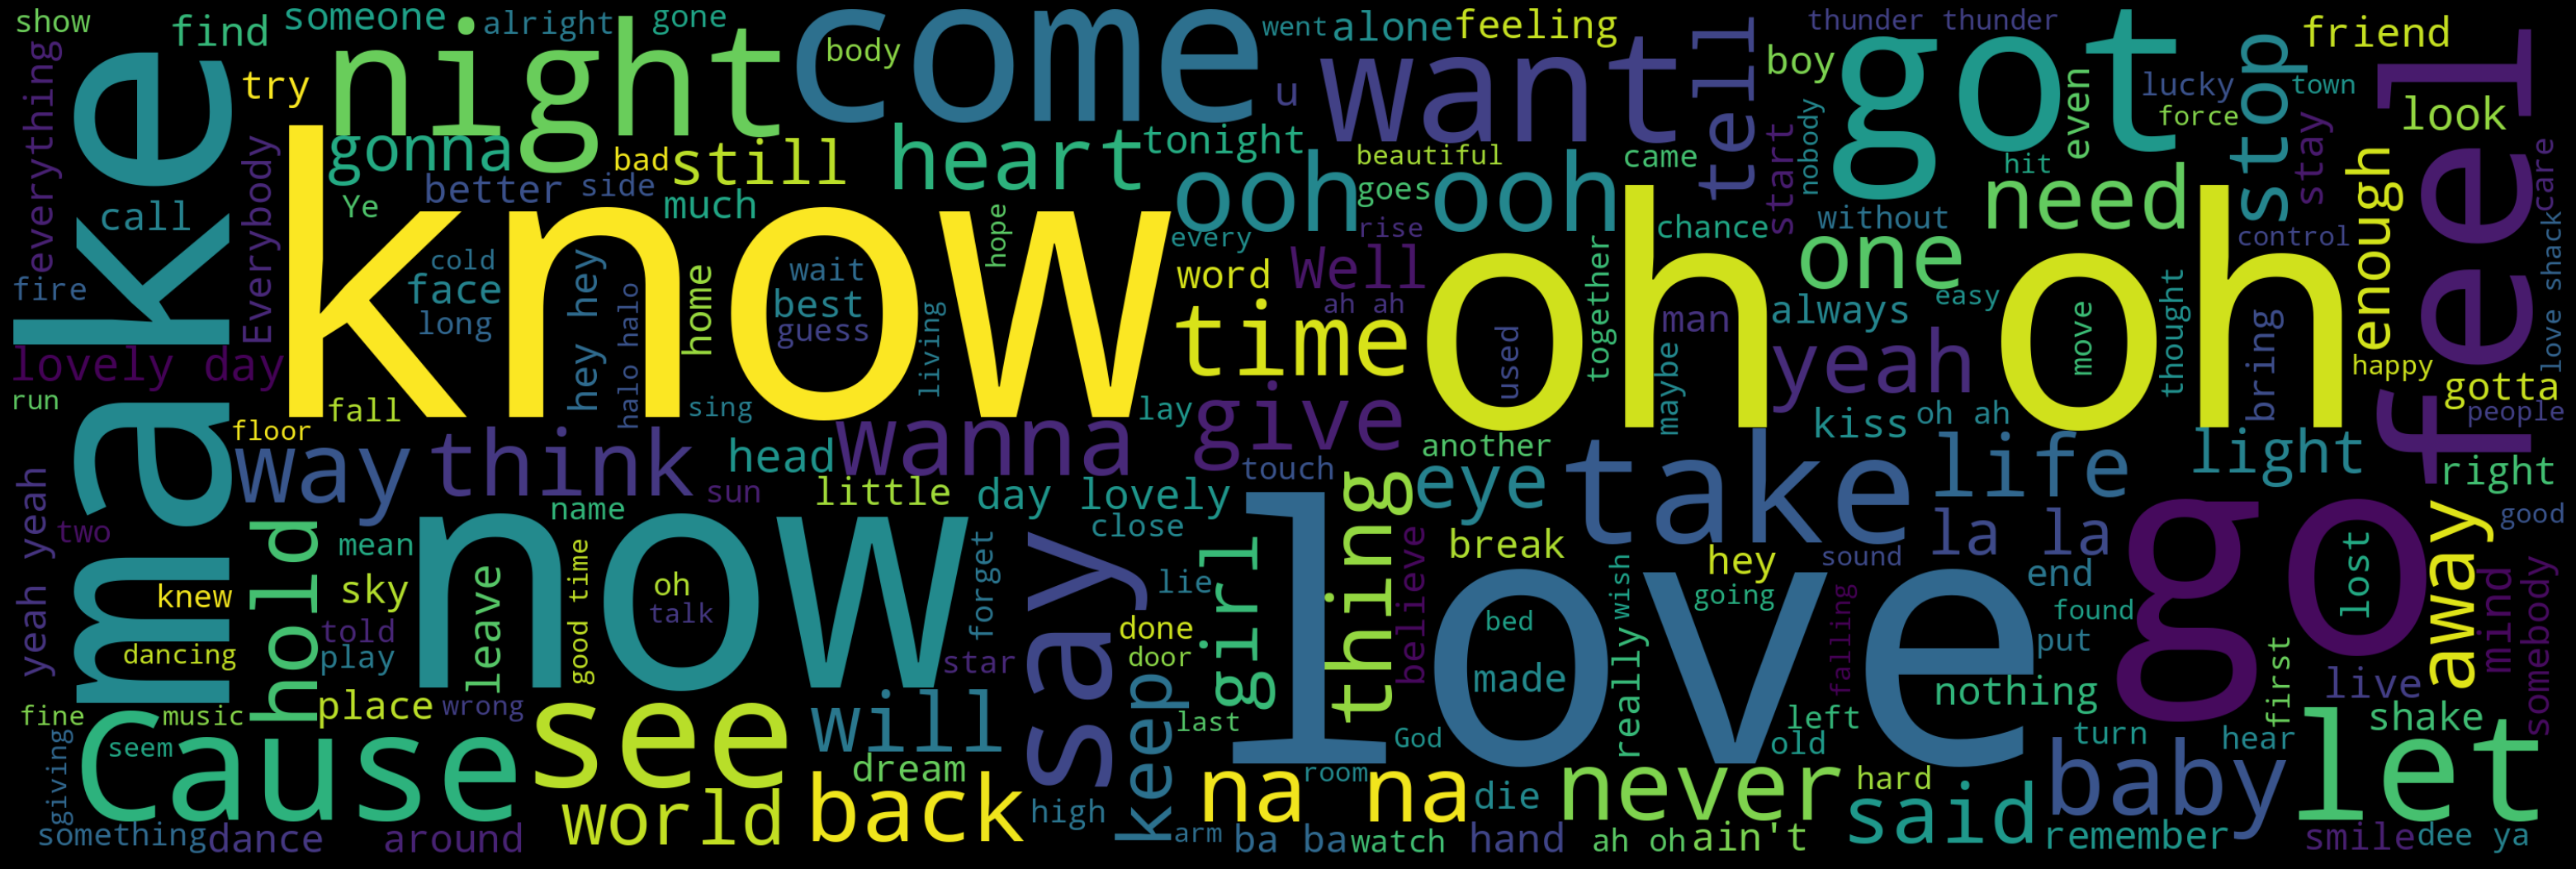

In [92]:
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
lyr = " ".join(i for i in df_copy.Lyrics)
stopwords = set(STOPWORDS)
wordcloud = wc.WordCloud(width = 3000,height = 1000,stopwords=stopwords).generate(lyr)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Lowercase Conversion and Removing the digits

In [93]:
# To remove Digits and convert all letters to lowercase
import re
df_copy['Lyrics'] = df_copy['Lyrics'].apply(lambda lyrics : re.sub(r"[0-9]", "", lyrics.lower()))
df_copy['Lyrics']

0      what would i do without your smart mouth? draw...
1      i fell by the wayside, like everyone else i ha...
2      help, i have done it again i have been here ma...
3      i heard that you're settled down that you foun...
4      here's a simple song won't stop the rain from ...
                             ...                        
329    if you see a faded sign at the side of the roa...
330    music is a world within itself with a language...
331    tonight's the night we're gonna make it happen...
332    you know you, you make me feel so good inside ...
333    i need love, love to ease my mind i need to fi...
Name: Lyrics, Length: 334, dtype: object

#### Tockenization

In [94]:
import nltk
from nltk import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df_copy['Lyrics'] = df_copy['Lyrics'].apply(lambda lyrics: tokenizer.tokenize(lyrics))
df_copy['Lyrics']

0      [what, would, i, do, without, your, smart, mou...
1      [i, fell, by, the, wayside, ,, like, everyone,...
2      [help, ,, i, have, done, it, again, i, have, b...
3      [i, heard, that, you, 're, settled, down, that...
4      [here, 's, a, simple, song, wo, n't, stop, the...
                             ...                        
329    [if, you, see, a, faded, sign, at, the, side, ...
330    [music, is, a, world, within, itself, with, a,...
331    [tonight, 's, the, night, we, 're, gon, na, ma...
332    [you, know, you, ,, you, make, me, feel, so, g...
333    [i, need, love, ,, love, to, ease, my, mind, i...
Name: Lyrics, Length: 334, dtype: object

#### Remove StopWords

In [95]:
nltk.download('stopwords')
from nltk.corpus import stopwords
negation_list = ["no","nor", "not", "n't"]
stopWords = [word for word in stopwords.words('english') if word not in negation_list]
stopWords += ["'ve","'s","'m","'ll","'re","wo","'d"]
stopWords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [96]:
# Remove stopwords from Lyrics column
df_copy['Lyrics'] = df_copy['Lyrics'].apply(lambda lyrics: [word for word in lyrics if word not in stopWords])
df_copy['Lyrics'].tolist()

[['would',
  'without',
  'smart',
  'mouth',
  '?',
  'drawing',
  ',',
  'kicking',
  'got',
  'head',
  'spinning',
  ',',
  'no',
  'kidding',
  ',',
  'ca',
  "n't",
  'pin',
  'going',
  'beautiful',
  'mind',
  '?',
  'magical',
  'mystery',
  'ride',
  'dizzy',
  ',',
  "n't",
  'know',
  'hit',
  ',',
  'alright',
  'head',
  'water',
  'breathing',
  'fine',
  'crazy',
  'mind',
  "'cause",
  'loves',
  'love',
  'curves',
  'edges',
  'perfect',
  'imperfections',
  'give',
  'give',
  'end',
  'beginning',
  'even',
  'lose',
  ',',
  'winning',
  "'cause",
  'give',
  'give',
  ',',
  'oh-oh',
  'many',
  'times',
  'tell',
  '?',
  'even',
  'crying',
  ',',
  'beautiful',
  'world',
  'beating',
  ',',
  'around',
  'every',
  'mood',
  'downfall',
  ',',
  'muse',
  'worst',
  'distraction',
  ',',
  'rhythm',
  'blues',
  'ca',
  "n't",
  'stop',
  'singing',
  ',',
  'ringing',
  'head',
  'head',
  'water',
  'breathing',
  'fine',
  'crazy',
  'mind',
  "'cause",
  

#### Removing Puncuation

In [97]:
# removing puncuations, and removing any dots, dashes, or empty strings, or question marks, exclamation marks

import string

df_copy['Lyrics'] = df_copy['Lyrics'].apply(lambda lyrics : list(filter(None,[word.replace('.', '').replace('_','').replace('-','').replace("'","" ).replace("`","").replace("?","").replace("!","") for word in lyrics if word not in string.punctuation])))

df_copy['Lyrics'].tolist() 

[['would',
  'without',
  'smart',
  'mouth',
  'drawing',
  'kicking',
  'got',
  'head',
  'spinning',
  'no',
  'kidding',
  'ca',
  'nt',
  'pin',
  'going',
  'beautiful',
  'mind',
  'magical',
  'mystery',
  'ride',
  'dizzy',
  'nt',
  'know',
  'hit',
  'alright',
  'head',
  'water',
  'breathing',
  'fine',
  'crazy',
  'mind',
  'cause',
  'loves',
  'love',
  'curves',
  'edges',
  'perfect',
  'imperfections',
  'give',
  'give',
  'end',
  'beginning',
  'even',
  'lose',
  'winning',
  'cause',
  'give',
  'give',
  'ohoh',
  'many',
  'times',
  'tell',
  'even',
  'crying',
  'beautiful',
  'world',
  'beating',
  'around',
  'every',
  'mood',
  'downfall',
  'muse',
  'worst',
  'distraction',
  'rhythm',
  'blues',
  'ca',
  'nt',
  'stop',
  'singing',
  'ringing',
  'head',
  'head',
  'water',
  'breathing',
  'fine',
  'crazy',
  'mind',
  'cause',
  'loves',
  'love',
  'curves',
  'edges',
  'perfect',
  'imperfections',
  'give',
  'give',
  'end',
  'beginn

#### Lemmatization

In [98]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

df_copy['Lyrics'] = df_copy['Lyrics'].apply(lambda lyrics: [lemmatizer.lemmatize(word) for word in lyrics])
df_copy['Lyrics']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0      [would, without, smart, mouth, drawing, kickin...
1      [fell, wayside, like, everyone, else, hate, ha...
2      [help, done, many, time, hurt, today, worst, p...
3      [heard, settled, found, girl, married, heard, ...
4      [simple, song, nt, stop, rain, coming, heart, ...
                             ...                        
329    [see, faded, sign, side, road, say, fifteen, m...
330    [music, world, within, language, understand, e...
331    [tonight, night, gon, na, make, happen, tonigh...
332    [know, make, feel, good, inside, always, wante...
333    [need, love, love, ease, mind, need, find, fin...
Name: Lyrics, Length: 334, dtype: object

### Data preparation for modelling

#### Label Encoding of mood column

In [99]:
# 0---> Happy
# 1---> Sad
df_copy['Mood'] = df_copy['Mood'].astype('category').cat.codes
df_copy['Mood']

0      1
1      1
2      1
3      1
4      1
      ..
329    0
330    0
331    0
332    0
333    0
Name: Mood, Length: 334, dtype: int8

In [100]:
df_copy['Lyrics']

0      [would, without, smart, mouth, drawing, kickin...
1      [fell, wayside, like, everyone, else, hate, ha...
2      [help, done, many, time, hurt, today, worst, p...
3      [heard, settled, found, girl, married, heard, ...
4      [simple, song, nt, stop, rain, coming, heart, ...
                             ...                        
329    [see, faded, sign, side, road, say, fifteen, m...
330    [music, world, within, language, understand, e...
331    [tonight, night, gon, na, make, happen, tonigh...
332    [know, make, feel, good, inside, always, wante...
333    [need, love, love, ease, mind, need, find, fin...
Name: Lyrics, Length: 334, dtype: object

#### Joining the words in lyrics column to appear as one string

In [101]:
#  Joining the words so the lyrics would appear as one string
df_copy['Lyrics']= df_copy['Lyrics'].apply(lambda x : " ".join(x))
df_copy['Lyrics']

0      would without smart mouth drawing kicking got ...
1      fell wayside like everyone else hate hate hate...
2      help done many time hurt today worst part noon...
3      heard settled found girl married heard dream c...
4      simple song nt stop rain coming heart breaking...
                             ...                        
329    see faded sign side road say fifteen mile love...
330    music world within language understand equal o...
331    tonight night gon na make happen tonight put t...
332    know make feel good inside always wanted girl ...
333    need love love ease mind need find find someon...
Name: Lyrics, Length: 334, dtype: object

### Splitting data into training and testing using leave one out cross validation

In [102]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()

### Random Forest Classifier Model

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_copy['Lyrics']  # Independent Variable
y = df_copy['Mood']  # Dependent Variable

y_true, y_pred = [], []

for train_ix, test_ix in cv.split(X):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    vectorizer = TfidfVectorizer(stop_words=stopWords)
    TFIDF_train = vectorizer.fit_transform(X_train)  # Transformed train lyrics
    TFIDF_test = vectorizer.transform(X_test)  # Transformed test lyrics

    random_forest_clf = RandomForestClassifier(random_state=1)
    random_forest_clf.fit(TFIDF_train, y_train)

    yhat = random_forest_clf.predict(TFIDF_test)
    y_true.append(y_test.iloc[0])  # Access the first element of y_test
    y_pred.append(yhat[0])

# Calculate classification report
classification_rep = classification_report(y_true, y_pred)
print("Random Forest Classifier Classification Report:")
print(classification_rep)

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       167
           1       0.75      0.75      0.75       167

    accuracy                           0.75       334
   macro avg       0.75      0.75      0.75       334
weighted avg       0.75      0.75      0.75       334



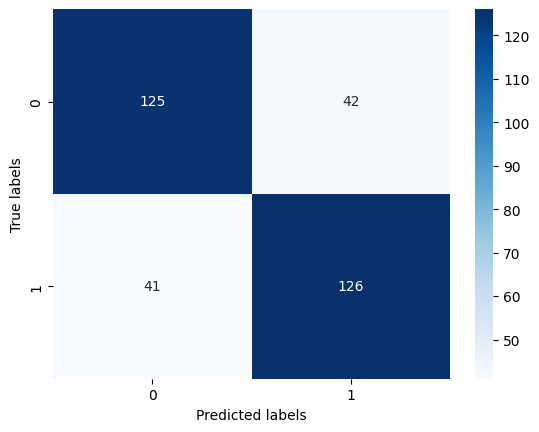

In [104]:
# Plotting the confsuion matrix of random forest classifier model to check the true and false positives and the true and false negatives
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_true, y_pred)
# plot the confusion matrix
sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Multinomial Naive Bayes Model

In [105]:
# Made another copy of the dataframe containing only the mood and lyrics columns which are the important attributes here
df_copy1 = df_copy[['Lyrics', 'Mood']].copy()
df_copy1

Lyrics  Mood
0    would without smart mouth drawing kicking got ...     1
1    fell wayside like everyone else hate hate hate...     1
2    help done many time hurt today worst part noon...     1
3    heard settled found girl married heard dream c...     1
4    simple song nt stop rain coming heart breaking...     1
..                                                 ...   ...
329  see faded sign side road say fifteen mile love...     0
330  music world within language understand equal o...     0
331  tonight night gon na make happen tonight put t...     0
332  know make feel good inside always wanted girl ...     0
333  need love love ease mind need find find someon...     0

[334 rows x 2 columns]

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X1 = df_copy1['Lyrics']  # Independent Variable
y1 = df_copy1['Mood']  # Dependent Variable

cv1 = LeaveOneOut()
y_true1, y_pred1 = [], []

for train_ix1, test_ix1 in cv1.split(X1):
    X1_train, X1_test = X1.iloc[train_ix1], X1.iloc[test_ix1]
    y1_train, y1_test = y1.iloc[train_ix1], y1.iloc[test_ix1]

    vectorizer = TfidfVectorizer(stop_words=stopWords)
    TFIDF_train1 = vectorizer.fit_transform(X1_train)  # Transformed train lyrics
    TFIDF_test1 = vectorizer.transform(X1_test)  # Transformed test lyrics

    naive_bayes_clf = MultinomialNB()
    naive_bayes_clf.fit(TFIDF_train1, y1_train)

    yhat1 = naive_bayes_clf.predict(TFIDF_test1)
    y_true1.append(y1_test.iloc[0])  # Access the first element of y_test
    y_pred1.append(yhat1[0])
# Calculate classification report
classification_rep = classification_report(y_true1, y_pred1)
print("Naive Bayes Classifier Classification Report:")
print(classification_rep)

Naive Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       167
           1       0.72      0.87      0.79       167

    accuracy                           0.76       334
   macro avg       0.78      0.76      0.76       334
weighted avg       0.78      0.76      0.76       334



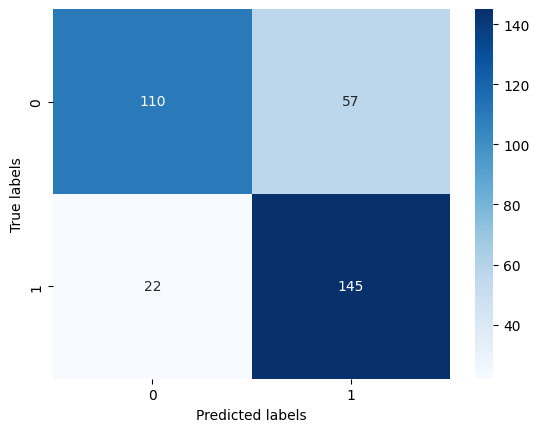

In [107]:
# Plotting the confsuion matrix of multinomial naive-bayes model to check the true and false positives and the true and false negatives
from sklearn.metrics import confusion_matrix
confusionMatrix1 = confusion_matrix(y_true1, y_pred1)
# plot the confusion matrix
sns.heatmap(confusionMatrix1, annot=True, cmap='Blues', fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Support Vector Machine (SVM)

In [108]:
# Made another copy of the dataframe containing only the mood and lyrics columns which are the important attributes here
df_copy2 = df_copy[['Lyrics', 'Mood']].copy()
df_copy2

Lyrics  Mood
0    would without smart mouth drawing kicking got ...     1
1    fell wayside like everyone else hate hate hate...     1
2    help done many time hurt today worst part noon...     1
3    heard settled found girl married heard dream c...     1
4    simple song nt stop rain coming heart breaking...     1
..                                                 ...   ...
329  see faded sign side road say fifteen mile love...     0
330  music world within language understand equal o...     0
331  tonight night gon na make happen tonight put t...     0
332  know make feel good inside always wanted girl ...     0
333  need love love ease mind need find find someon...     0

[334 rows x 2 columns]

In [109]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X2 = df_copy2['Lyrics']  # Independent Variable
y2 = df_copy2['Mood']  # Dependent Variable

cv2 = LeaveOneOut()
y_true2, y_pred2 = [], []

for train_ix2, test_ix2 in cv2.split(X2):
    X2_train, X2_test = X2.iloc[train_ix2], X2.iloc[test_ix2]
    y2_train, y2_test = y2.iloc[train_ix2], y2.iloc[test_ix2]

    vectorizer = TfidfVectorizer(stop_words=stopWords)
    TFIDF_train2 = vectorizer.fit_transform(X2_train)  # Transformed train lyrics
    TFIDF_test2 = vectorizer.transform(X2_test)  # Transformed test lyrics

    svc_model=SVC(kernel='rbf')
    svc_model.fit(TFIDF_train2, y2_train)

    yhat2 = svc_model.predict(TFIDF_test2)
    y_true2.append(y2_test.iloc[0])  # Access the first element of y_test
    y_pred2.append(yhat2[0])
# Calculate classification report
classification_rep = classification_report(y_true2, y_pred2)
print("Support Vector Machine Classification Report:")
print(classification_rep)

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       167
           1       0.73      0.80      0.77       167

    accuracy                           0.75       334
   macro avg       0.76      0.75      0.75       334
weighted avg       0.76      0.75      0.75       334



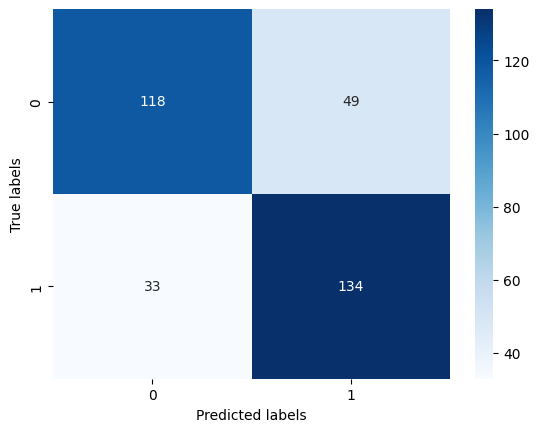

In [110]:
# Plotting the confsuion matrix of multinomial naive-bayes model to check the true and false positives and the true and false negatives
from sklearn.metrics import confusion_matrix
confusionMatrix2 = confusion_matrix(y_true2, y_pred2)
# plot the confusion matrix
sns.heatmap(confusionMatrix2, annot=True, cmap='Blues', fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()